<a href="https://colab.research.google.com/github/loyoladesa/qoeprediction/blob/main/notebooks/Ajustando_Dataset_Causalidade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
#libraries for data manipulation
import numpy as np
import pandas as pd
import networkx as nx

## Constantes

In [ ]:
path_dataset_metricas_rnp = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/dataset/dataset_rnp_final.csv'
path_dataset_metricas_rnp_transposto = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/dataset/dataset_rnp_transposto.csv'

path_dataset_metricas_rnp_transposto_1 = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/dataset/dataset_rnp_transposto_1.csv'

path_adj = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/grafo.adj'
path_gexf = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/grafo_causalidade_rnp.gexf'
path_gexf_1 = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/grafo_causalidade_rnp_1.gexf'

pop_destino = ['am', 'ap', 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mg', 'ms', 'mt', 'pa', 'pb', 'pe','pi', 'pr', 'rn', 'ro', 'rr', 'rs', 'sc', 'se', 'sp', 'to']

# Carregando o Dataset

In [ ]:
G = nx.read_gexf(path_gexf)

['0', '1', '311', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '122', '138', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '159', '160', '161', '162', '163', '164', '165', '167', '216', '288', '290', '292', '307', '120', '218', '239', '297', '127', '234', '121', '140', '49', '97', '133', '139', '242', '245', '266', '267', '276', '50', '98', '108', '114', '136', '175', '221', '223', '228', '240', '285', '296', '51', '99', '169', '217', '219', '226', '231', '254', '282', '301', '53', '101', '105', '106', '112', '275', '283', '54', '102', '131', '177', '225', '244', '268', '280', '55', '103', '109', '115', '117', '124', '125', '141', '224', '229', '237', '241', '261', '263', '289', '295', '305', '57', '60', '65', '67', '69', '96', '100', '110', '113', '143', '173', '181', '235', '58', '59', '107', '294', '61', '63', '111', '306', '62', '126', '130', '135', '171', '230', '259', 

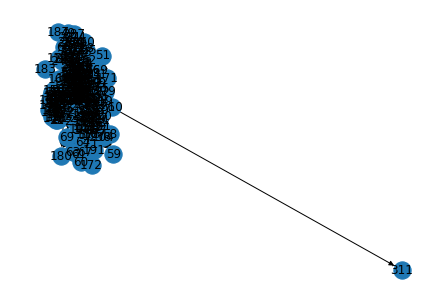

In [ ]:
print(G.nodes()) # [4, 5]

n_vertices = G.number_of_nodes()
n_arestas = G.number_of_edges()
print('vertices: ', n_vertices, '\narestas: ', n_arestas)

nx.draw(G, with_labels=True)

In [ ]:
nodes = list(G.nodes())
type(nodes)
print(nodes)

['0', '1', '311', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '122', '138', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '159', '160', '161', '162', '163', '164', '165', '167', '216', '288', '290', '292', '307', '120', '218', '239', '297', '127', '234', '121', '140', '49', '97', '133', '139', '242', '245', '266', '267', '276', '50', '98', '108', '114', '136', '175', '221', '223', '228', '240', '285', '296', '51', '99', '169', '217', '219', '226', '231', '254', '282', '301', '53', '101', '105', '106', '112', '275', '283', '54', '102', '131', '177', '225', '244', '268', '280', '55', '103', '109', '115', '117', '124', '125', '141', '224', '229', '237', '241', '261', '263', '289', '295', '305', '57', '60', '65', '67', '69', '96', '100', '110', '113', '143', '173', '181', '235', '58', '59', '107', '294', '61', '63', '111', '306', '62', '126', '130', '135', '171', '230', '259', 

In [ ]:
df_edge = nx.to_pandas_edgelist(G) 
df_edge

,source,target,id
0,0,1,0
1,0,2,1
2,0,3,2
3,0,5,3
4,0,6,4
...,...,...,...
9080,279,282,9080
9081,279,283,9081
9082,279,284,9082
9083,279,285,9083


## Mapeamento vertices -> indice

In [ ]:
mapping = {}
cont = 0
chaves = []
for no in nodes:
  mapping[no] = cont
  chaves.append(cont)
  cont = cont + 1

In [ ]:
print(mapping)

{'0': 0, '1': 1, '311': 2, '2': 3, '3': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '15': 14, '16': 15, '17': 16, '18': 17, '19': 18, '20': 19, '21': 20, '22': 21, '23': 22, '122': 23, '138': 24, '144': 25, '145': 26, '146': 27, '147': 28, '149': 29, '150': 30, '151': 31, '152': 32, '153': 33, '154': 34, '155': 35, '156': 36, '157': 37, '159': 38, '160': 39, '161': 40, '162': 41, '163': 42, '164': 43, '165': 44, '167': 45, '216': 46, '288': 47, '290': 48, '292': 49, '307': 50, '120': 51, '218': 52, '239': 53, '297': 54, '127': 55, '234': 56, '121': 57, '140': 58, '49': 59, '97': 60, '133': 61, '139': 62, '242': 63, '245': 64, '266': 65, '267': 66, '276': 67, '50': 68, '98': 69, '108': 70, '114': 71, '136': 72, '175': 73, '221': 74, '223': 75, '228': 76, '240': 77, '285': 78, '296': 79, '51': 80, '99': 81, '169': 82, '217': 83, '219': 84, '226': 85, '231': 86, '254': 87, '282': 88, '301': 89, '53': 90, '101': 91, '105': 92, '106': 93, '112': 94, '2

In [ ]:
for chave in mapping.keys():
  print(f'NÓ = {chave} - ID = {mapping[chave]}')

NÓ = 0 - ID = 0
NÓ = 1 - ID = 1
NÓ = 311 - ID = 2
NÓ = 2 - ID = 3
NÓ = 3 - ID = 4
NÓ = 5 - ID = 5
NÓ = 6 - ID = 6
NÓ = 7 - ID = 7
NÓ = 8 - ID = 8
NÓ = 9 - ID = 9
NÓ = 10 - ID = 10
NÓ = 11 - ID = 11
NÓ = 12 - ID = 12
NÓ = 13 - ID = 13
NÓ = 15 - ID = 14
NÓ = 16 - ID = 15
NÓ = 17 - ID = 16
NÓ = 18 - ID = 17
NÓ = 19 - ID = 18
NÓ = 20 - ID = 19
NÓ = 21 - ID = 20
NÓ = 22 - ID = 21
NÓ = 23 - ID = 22
NÓ = 122 - ID = 23
NÓ = 138 - ID = 24
NÓ = 144 - ID = 25
NÓ = 145 - ID = 26
NÓ = 146 - ID = 27
NÓ = 147 - ID = 28
NÓ = 149 - ID = 29
NÓ = 150 - ID = 30
NÓ = 151 - ID = 31
NÓ = 152 - ID = 32
NÓ = 153 - ID = 33
NÓ = 154 - ID = 34
NÓ = 155 - ID = 35
NÓ = 156 - ID = 36
NÓ = 157 - ID = 37
NÓ = 159 - ID = 38
NÓ = 160 - ID = 39
NÓ = 161 - ID = 40
NÓ = 162 - ID = 41
NÓ = 163 - ID = 42
NÓ = 164 - ID = 43
NÓ = 165 - ID = 44
NÓ = 167 - ID = 45
NÓ = 216 - ID = 46
NÓ = 288 - ID = 47
NÓ = 290 - ID = 48
NÓ = 292 - ID = 49
NÓ = 307 - ID = 50
NÓ = 120 - ID = 51
NÓ = 218 - ID = 52
NÓ = 239 - ID = 53
NÓ = 297 - ID =

## Renomear Vertices


In [ ]:
H = nx.relabel_nodes(G, mapping)

In [ ]:
df_edge = nx.to_pandas_edgelist(H) 
df_edge

,source,target,id
0,0,1,0
1,0,3,1
2,0,4,2
3,0,5,3
4,0,6,4
...,...,...,...
9080,224,88,9080
9081,224,96,9081
9082,224,223,9082
9083,224,78,9083


In [ ]:
nx.write_gexf(H,path_gexf_1)

### Carregar Vértices

In [ ]:
print(nodes)

['0', '1', '311', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '122', '138', '144', '145', '146', '147', '149', '150', '151', '152', '153', '154', '155', '156', '157', '159', '160', '161', '162', '163', '164', '165', '167', '216', '288', '290', '292', '307', '120', '218', '239', '297', '127', '234', '121', '140', '49', '97', '133', '139', '242', '245', '266', '267', '276', '50', '98', '108', '114', '136', '175', '221', '223', '228', '240', '285', '296', '51', '99', '169', '217', '219', '226', '231', '254', '282', '301', '53', '101', '105', '106', '112', '275', '283', '54', '102', '131', '177', '225', '244', '268', '280', '55', '103', '109', '115', '117', '124', '125', '141', '224', '229', '237', '241', '261', '263', '289', '295', '305', '57', '60', '65', '67', '69', '96', '100', '110', '113', '143', '173', '181', '235', '58', '59', '107', '294', '61', '63', '111', '306', '62', '126', '130', '135', '171', '230', '259', 

In [ ]:
n_vertices = G.number_of_nodes()
n_arestas = G.number_of_edges()
print(n_arestas)
print(n_vertices)

9085
225


In [ ]:
df = pd.read_csv(path_dataset_metricas_rnp_transposto_1,sep=",")
df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_24311,f_24312,f_24313,f_24314,f_24315,f_24316,f_24317,f_24318,f_24319,f_24320
0,0.0,845572.0,847565.0,803419.0,355415.0,862925.0,858680.0,848193.0,865224.0,870475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,820199.0,787375.0,831836.0,808513.0,895327.0,833251.0,880806.0,870592.0,844471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,112000.0,112000.0,112000.0,112000.0,112000.0,112000.0,112700.0,112000.0,119000.0,...,157000.0,24469.0,8840.0,157000.0,8928.0,8830.0,9080.0,52830.0,46200.0,60800.0
3,3.0,7840729.0,3424706.0,3847770.0,7283799.0,6807939.0,4794570.0,6550021.0,7193237.0,5899383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,866019.0,864759.0,861982.0,854601.0,842006.0,887201.0,881331.0,887360.0,877294.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,221.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,222.0,54.0,54.0,54.0,54.0,54.0,54.0,53.0,53.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,223.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
indices = list(df.index)
print(len(indices))
print(indices)

225
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [ ]:
for indice in indices:
  df.loc[indice]['id'] = indice

In [ ]:
df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_24311,f_24312,f_24313,f_24314,f_24315,f_24316,f_24317,f_24318,f_24319,f_24320
0,0.0,845572.0,847565.0,803419.0,355415.0,862925.0,858680.0,848193.0,865224.0,870475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,820199.0,787375.0,831836.0,808513.0,895327.0,833251.0,880806.0,870592.0,844471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,112000.0,112000.0,112000.0,112000.0,112000.0,112000.0,112700.0,112000.0,119000.0,...,157000.0,24469.0,8840.0,157000.0,8928.0,8830.0,9080.0,52830.0,46200.0,60800.0
3,3.0,7840729.0,3424706.0,3847770.0,7283799.0,6807939.0,4794570.0,6550021.0,7193237.0,5899383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,866019.0,864759.0,861982.0,854601.0,842006.0,887201.0,881331.0,887360.0,877294.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,221.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,222.0,54.0,54.0,54.0,54.0,54.0,54.0,53.0,53.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,223.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv(path_dataset_metricas_rnp_transposto_1,index=False)

## Retirar Vertices Não Usados

In [ ]:
no_serem_retirados = []
for no in indices:
  no = str(no)
  if(not(no in nodes)):
      #print("No = ",no)
      no_serem_retirados.append(int(no))  

print("Nos retirados: ",no_serem_retirados)
print(len(no_serem_retirados))

Nos retirados:  [4, 14, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 52, 56, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 148, 158, 166, 176, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215]
84


In [ ]:
import pickle

path_mapeamento_id_metrica = '/content/drive/MyDrive/Seagate/RNP/dataset_set_2022/dataset/mapeamento_id_metrica.dct'

file = open(path_mapeamento_id_metrica,'rb')
mapeamento_id_metrica = pickle.load(file)
file.close()

In [ ]:
for chave in no_serem_retirados:
  print(f'ID = {chave} - Métrica = {mapeamento_id_metrica[chave]}')

ID = 4 - Métrica = Throughput_rj_df
ID = 14 - Métrica = Throughput_rj_pi
ID = 24 - Métrica = Packet Retransmits_rj_am
ID = 25 - Métrica = Packet Retransmits_rj_ap
ID = 26 - Métrica = Packet Retransmits_rj_ba
ID = 27 - Métrica = Packet Retransmits_rj_ce
ID = 28 - Métrica = Packet Retransmits_rj_df
ID = 29 - Métrica = Packet Retransmits_rj_es
ID = 30 - Métrica = Packet Retransmits_rj_go
ID = 31 - Métrica = Packet Retransmits_rj_ma
ID = 32 - Métrica = Packet Retransmits_rj_mg
ID = 33 - Métrica = Packet Retransmits_rj_ms
ID = 34 - Métrica = Packet Retransmits_rj_mt
ID = 35 - Métrica = Packet Retransmits_rj_pa
ID = 36 - Métrica = Packet Retransmits_rj_pb
ID = 37 - Métrica = Packet Retransmits_rj_pe
ID = 38 - Métrica = Packet Retransmits_rj_pi
ID = 39 - Métrica = Packet Retransmits_rj_pr
ID = 40 - Métrica = Packet Retransmits_rj_rn
ID = 41 - Métrica = Packet Retransmits_rj_ro
ID = 42 - Métrica = Packet Retransmits_rj_rr
ID = 43 - Métrica = Packet Retransmits_rj_rs
ID = 44 - Métrica = Packet 

In [ ]:
df.drop(no_serem_retirados,inplace=True)

In [ ]:
df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_24311,f_24312,f_24313,f_24314,f_24315,f_24316,f_24317,f_24318,f_24319,f_24320
0,0,845572.0,847565.0,803419.0,355415.0,862925.0,858680.0,848193.0,865224.0,870475.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,820199.0,787375.0,831836.0,808513.0,895327.0,833251.0,880806.0,870592.0,844471.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,7840729.0,3424706.0,3847770.0,7283799.0,6807939.0,4794570.0,6550021.0,7193237.0,5899383.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,866019.0,864759.0,861982.0,854601.0,842006.0,887201.0,881331.0,887360.0,877294.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,858103.0,878133.0,694367.0,873149.0,880124.0,794035.0,647495.0,870579.0,647747.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,105500.0,105000.0,106000.0,105100.0,105000.0,106000.0,107500.0,105000.0,126000.0,...,25100.000000,24970.000000,24900.000000,25100.000000,23760.000000,23600.000000,24800.000000,23620.000000,23500.000000,23700.000000
308,308,66540.0,59800.0,127000.0,59820.0,59800.0,59900.0,61100.0,61100.0,61100.0,...,19800.000000,19640.000000,19600.000000,19700.000000,19640.000000,19600.000000,19800.000000,19630.000000,19600.000000,19700.000000
309,309,43470.0,43400.0,43600.0,44430.0,43400.0,48100.0,43470.0,43400.0,43500.0,...,29400.000000,41237.690030,41237.690030,41237.690030,41237.690030,41237.690030,41237.690030,41237.690030,41237.690030,41237.690030
310,310,28140.0,28100.0,28400.0,29670.0,28200.0,31700.0,28130.0,28100.0,28200.0,...,53190.357948,53190.357948,53190.357948,53190.357948,53190.357948,53190.357948,53190.357948,53190.357948,53190.357948,53190.357948


In [ ]:
new_df = pd.DataFrame()
new_df

""


In [ ]:
for key in mapping.keys():
  linha = df.loc[int(key)]
  new_df = new_df.append(linha)

In [ ]:
new_df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_24311,f_24312,f_24313,f_24314,f_24315,f_24316,f_24317,f_24318,f_24319,f_24320
0,0.0,845572.0,847565.0,803419.0,355415.0,862925.0,858680.0,848193.0,865224.0,870475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,820199.0,787375.0,831836.0,808513.0,895327.0,833251.0,880806.0,870592.0,844471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,311.0,112000.0,112000.0,112000.0,112000.0,112000.0,112000.0,112700.0,112000.0,119000.0,...,157000.0,24469.0,8840.0,157000.0,8928.0,8830.0,9080.0,52830.0,46200.0,60800.0
2,2.0,7840729.0,3424706.0,3847770.0,7283799.0,6807939.0,4794570.0,6550021.0,7193237.0,5899383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,866019.0,864759.0,861982.0,854601.0,842006.0,887201.0,881331.0,887360.0,877294.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,271.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,277.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,274.0,54.0,54.0,54.0,54.0,54.0,54.0,53.0,53.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,284.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_df = new_df.reset_index()

In [ ]:
new_df.drop(["index"],axis = 1,inplace=True)

In [ ]:
new_df

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_24311,f_24312,f_24313,f_24314,f_24315,f_24316,f_24317,f_24318,f_24319,f_24320
0,0.0,845572.0,847565.0,803419.0,355415.0,862925.0,858680.0,848193.0,865224.0,870475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,820199.0,787375.0,831836.0,808513.0,895327.0,833251.0,880806.0,870592.0,844471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,311.0,112000.0,112000.0,112000.0,112000.0,112000.0,112000.0,112700.0,112000.0,119000.0,...,157000.0,24469.0,8840.0,157000.0,8928.0,8830.0,9080.0,52830.0,46200.0,60800.0
3,2.0,7840729.0,3424706.0,3847770.0,7283799.0,6807939.0,4794570.0,6550021.0,7193237.0,5899383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,866019.0,864759.0,861982.0,854601.0,842006.0,887201.0,881331.0,887360.0,877294.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,271.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,277.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,274.0,54.0,54.0,54.0,54.0,54.0,54.0,53.0,53.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,284.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_df.to_csv(path_dataset_metricas_rnp_transposto_1,index=False)

## Restante do Codigo

In [ ]:
indices = list(df.index)
print(indices)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 191, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 

In [ ]:
# importing the module
import pandas as pd
  
# creating a DataFrame
data = {'Name' : ['Simon', 'Marsh', 'Gaurav', 
                 'Alex', 'Selena'],  
        'Maths' : [8, 5, 6, 9, 7],  
        'Science' : [7, 9, 5, 4, 7], 
        'English' : [7, 4, 7, 6, 8]} 
df = pd.DataFrame(data)
print("Original DataFrame")
display(df)
  
print("Value of row 3 (Alex)")
display(df.iloc[3])

Original DataFrame


,Name,Maths,Science,English
0,Simon,8,7,7
1,Marsh,5,9,4
2,Gaurav,6,5,7
3,Alex,9,4,6
4,Selena,7,7,8


Value of row 3 (Alex)


Name       Alex
Maths         9
Science       4
English       6
Name: 3, dtype: object

In [ ]:
indices = list(df.index)

In [ ]:
print(indices)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 191, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 

In [ ]:
map_index = {}
cont = 0
chaves = []
for indice in indices:
  map_index[indice] = cont
  chaves.append(cont)
  cont = cont + 1

In [ ]:
print(map_index)

{0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 15: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 49: 22, 50: 23, 51: 24, 53: 25, 54: 26, 55: 27, 57: 28, 58: 29, 59: 30, 60: 31, 61: 32, 62: 33, 63: 34, 64: 35, 65: 36, 66: 37, 67: 38, 68: 39, 69: 40, 70: 41, 71: 42, 96: 43, 97: 44, 98: 45, 99: 46, 100: 47, 101: 48, 102: 49, 103: 50, 104: 51, 105: 52, 106: 53, 107: 54, 108: 55, 109: 56, 110: 57, 111: 58, 112: 59, 113: 60, 114: 61, 115: 62, 116: 63, 117: 64, 118: 65, 119: 66, 120: 67, 121: 68, 122: 69, 123: 70, 124: 71, 125: 72, 126: 73, 127: 74, 128: 75, 129: 76, 130: 77, 131: 78, 132: 79, 133: 80, 134: 81, 135: 82, 136: 83, 137: 84, 138: 85, 139: 86, 140: 87, 141: 88, 142: 89, 143: 90, 144: 91, 145: 92, 146: 93, 147: 94, 149: 95, 150: 96, 151: 97, 152: 98, 153: 99, 154: 100, 155: 101, 156: 102, 157: 103, 159: 104, 160: 105, 161: 106, 162: 107, 163: 108, 164: 109, 165: 110, 167: 111, 168: 112, 169: 113, 170: 114, 171: 115, 172: 

In [ ]:
print(chaves)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
df.index = chaves

In [ ]:
df

,id,f_0,f_1,...,f_24318,f_24319,f_24320
0,0,845572.0,847565.0,...,0.000000,0.000000,0.000000
1,1,820199.0,787375.0,...,0.000000,0.000000,0.000000
2,2,7840729.0,3424706.0,...,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
222,309,43470.0,43400.0,...,41237.690030,41237.690030,41237.690030
223,310,28140.0,28100.0,...,53190.357948,53190.357948,53190.357948
224,311,112000.0,112000.0,...,52830.000000,46200.000000,60800.000000


In [ ]:
média_RTT = df['f_24320'].mean()

In [ ]:
target =df['f_24320'].apply(classificar_alvo)

In [ ]:
target

0      0
1      0
2      0
      ..
222    1
223    1
224    1
Name: f_24320, Length: 225, dtype: int64

In [ ]:
df['f_24320'] = target

In [ ]:
df

,id,f_0,f_1,...,f_24318,f_24319,f_24320
0,0,845572.0,847565.0,...,0.000000,0.000000,0
1,1,820199.0,787375.0,...,0.000000,0.000000,0
2,2,7840729.0,3424706.0,...,0.000000,0.000000,0
...,...,...,...,...,...,...,...
222,309,43470.0,43400.0,...,41237.690030,41237.690030,1
223,310,28140.0,28100.0,...,53190.357948,53190.357948,1
224,311,112000.0,112000.0,...,52830.000000,46200.000000,1


In [ ]:
nx.write_gexf(H,path_gexf)